In [2]:
import pandas as pd 
import numpy as np
import seaborn as sns
import nltk


In [3]:
import re
from nltk.corpus  import wordnet
nltk.download("stopwords")
nltk.download("wordnet")

[nltk_data] Error loading stopwords: <urlopen error [Errno 11001]
[nltk_data]     getaddrinfo failed>
[nltk_data] Error loading wordnet: <urlopen error [Errno 11001]
[nltk_data]     getaddrinfo failed>


False

In [4]:
df = pd.read_csv("WELFake_Dataset.csv", encoding="latin1",usecols=["title","text","label"])
df_0=df[df["label"]==0].sample(5000)
df_1=df[df["label"]==1].sample(5000)


C:\Users\zas\AppData\Local\Temp\ipykernel_12592\1975891199.py:1: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("WELFake_Dataset.csv", encoding="latin1",usecols=["title","text","label"])


In [5]:
df.columns

Index(['title', 'text', 'label'], dtype='object')

In [6]:
data=pd.concat([df_0,df_1])
data.head()

,title,text,label
50262,"Palestinian rivals Fatah, Hamas sign reconcili...",GAZA/CAIRO (Reuters) - Rival Palestinian facti...,0.0
5447,Senate delays healthcare vote as McCain recove...,WASHINGTON (Reuters) - The U.S. Senate will de...,0
5531,Soccer player Messi prison sentence lifted in ...,MADRID (Reuters) - A Spanish court said on Fri...,0
70036,"Trump, McConnell say they remain united on sha...",WASHINGTON (Reuters) - U.S. President Donald T...,0
76079,Penn State Trustee Bows Out of Election After ...,A Penn State Trustee has dropped his bid and...,0


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 50262 to 66883
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   title   9925 non-null   object
 1   text    9995 non-null   object
 2   label   10000 non-null  object
dtypes: object(3)
memory usage: 312.5+ KB


In [8]:
data.isna().sum()

title    75
text      5
label     0
dtype: int64

In [9]:
len(data.columns)

3

In [10]:
data.dropna(inplace=True)
data.isna().sum()

title    0
text     0
label    0
dtype: int64

In [11]:
data.reset_index(inplace=True)
data.head()

,index,title,text,label
0,50262,"Palestinian rivals Fatah, Hamas sign reconcili...",GAZA/CAIRO (Reuters) - Rival Palestinian facti...,0.0
1,5447,Senate delays healthcare vote as McCain recove...,WASHINGTON (Reuters) - The U.S. Senate will de...,0
2,5531,Soccer player Messi prison sentence lifted in ...,MADRID (Reuters) - A Spanish court said on Fri...,0
3,70036,"Trump, McConnell say they remain united on sha...",WASHINGTON (Reuters) - U.S. President Donald T...,0
4,76079,Penn State Trustee Bows Out of Election After ...,A Penn State Trustee has dropped his bid and...,0


In [12]:
data.shape

(9920, 4)

In [13]:
X=data.drop("label",axis=1)
y=data.label

In [14]:
y.head()

0    0.0
1      0
2      0
3      0
4      0
Name: label, dtype: object

In [15]:
messages = X.copy()

In [16]:
messages.head()

,index,title,text
0,50262,"Palestinian rivals Fatah, Hamas sign reconcili...",GAZA/CAIRO (Reuters) - Rival Palestinian facti...
1,5447,Senate delays healthcare vote as McCain recove...,WASHINGTON (Reuters) - The U.S. Senate will de...
2,5531,Soccer player Messi prison sentence lifted in ...,MADRID (Reuters) - A Spanish court said on Fri...
3,70036,"Trump, McConnell say they remain united on sha...",WASHINGTON (Reuters) - U.S. President Donald T...
4,76079,Penn State Trustee Bows Out of Election After ...,A Penn State Trustee has dropped his bid and...


In [17]:
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer,WordNetLemmatizer
ps=PorterStemmer()
lm=WordNetLemmatizer()
corpus=[]
for  var in range(len(messages)):
   review=re.sub("[^a-zA-Z0_9]"," ",messages["title"][var])
   review=review.lower()
   review=review.split()
   review=[lm.lemmatize(x) for x in review if  x not in  stopwords.words("english")]
   review=" ".join(review)
   corpus.append(review)

In [18]:
corpus[0:5]

['palestinian rival fatah hamas sign reconciliation accord',
 'senate delay healthcare vote mccain recovers surgery',
 'soccer player messi prison sentence lifted exchange fine',
 'trump mcconnell say remain united shared goal',
 'penn state trustee bow election disparaging sandusky victim breitbart']

In [19]:
print(sum(len(var.split())for var in corpus))

89995


In [20]:
print(max(len(var.split()) for var in corpus))

47


In [21]:
len(corpus)

9920

In [22]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf=TfidfVectorizer(max_features=5000)
x=tfidf.fit_transform(corpus).toarray()


In [23]:
y = data["label"]
y=y.astype(np.int32())
y.dtype


dtype('int32')

In [24]:
y.isna().sum()

0

In [25]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test= train_test_split(x,y,test_size=0.2,random_state=42)

In [26]:
# y_train.isna().sum()
# y_train.dtype

In [27]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier()
rfc.fit(X_train,y_train)

RandomForestClassifier()

RandomForestClassifier
              precision    recall  f1-score   support

           0     0.8708    0.8458    0.8581      1012
           1     0.8442    0.8693    0.8566       972

    accuracy                         0.8574      1984
   macro avg     0.8575    0.8576    0.8574      1984
weighted avg     0.8577    0.8574    0.8574      1984



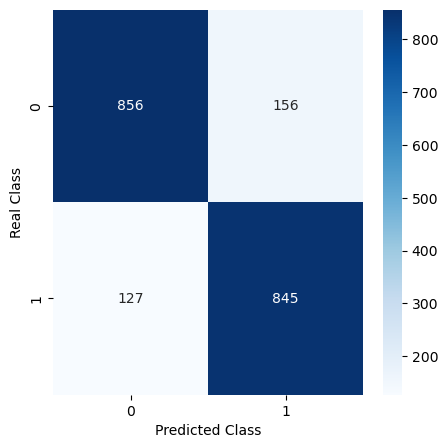

In [28]:
y_pred_rfc=rfc.predict(X_test)
from sklearn.metrics import classification_report,confusion_matrix
import matplotlib.pyplot as plt
print("RandomForestClassifier")
print(classification_report(y_test,y_pred_rfc,digits=4))
cm=confusion_matrix(y_test,y_pred_rfc)
plt.figure(figsize=(5,5),dpi=100)
sns.heatmap(cm,cmap="Blues",annot=True,fmt="d")

plt.xlabel('Predicted Class')
plt.ylabel('Real Class')
plt.show()



In [29]:
from sklearn.naive_bayes import MultinomialNB
mtnb=MultinomialNB()
mtnb.fit(X_train,y_train)


MultinomialNB()

MultinomialNB
              precision    recall  f1-score   support

           0     0.8708    0.8458    0.8581      1012
           1     0.8442    0.8693    0.8566       972

    accuracy                         0.8574      1984
   macro avg     0.8575    0.8576    0.8574      1984
weighted avg     0.8577    0.8574    0.8574      1984



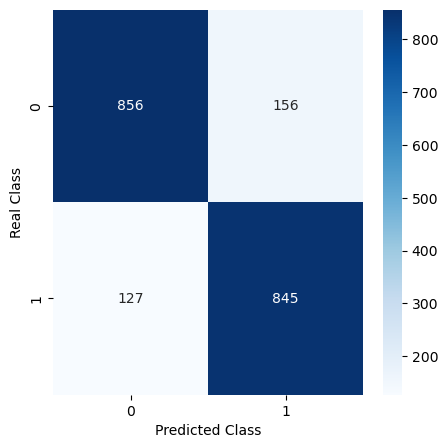

In [30]:
y_pred_mtnb=rfc.predict(X_test)

print("MultinomialNB")
print(classification_report(y_test,y_pred_mtnb,digits=4))
cm=confusion_matrix(y_test,y_pred_mtnb)
plt.figure(figsize=(5,5),dpi=100)
sns.heatmap(cm,cmap="Blues",annot=True,fmt="d")

plt.xlabel('Predicted Class')
plt.ylabel('Real Class')
plt.show()

In [31]:
from sklearn.linear_model import LogisticRegression,SGDClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier,VotingClassifier,GradientBoostingClassifier
from xgboost import XGBClassifier

logistic_regression=LogisticRegression()
svm=SVC()
sgdclassifier=SGDClassifier()
dtc=DecisionTreeClassifier()
xgboost=XGBClassifier()
gradient_boosting = GradientBoostingClassifier()
adaboost = AdaBoostClassifier()
from sklearn.metrics import precision_score,accuracy_score,f1_score,recall_score

logistic_regression.fit(X_train, y_train)
svm.fit(X_train, y_train)
sgdclassifier.fit(X_train, y_train)
dtc.fit(X_train, y_train)
gradient_boosting.fit(X_train, y_train)
adaboost.fit(X_train, y_train)
xgboost.fit(X_train, y_train)

models=[logistic_regression,svm,sgdclassifier,dtc,xgboost,gradient_boosting,adaboost]
models_names=["Logistic Regression","SVC","SGD Classifier","Decision Tree Classifier","XG Boosting Classifier",
              "Gradient Boosting Classifier","Ada Boost Classifier"]
for name,model  in zip(models_names,models):
  print(f"----------{name}-------")
  print(f" accuracy_score  {accuracy_score(y_test,model.predict(X_test))}")
  print(f" precision_score  {precision_score(y_test,model.predict(X_test))}")
  print(f" recall_score  {recall_score(y_test,model.predict(X_test))}")
  print(f" f1_score  {f1_score(y_test,model.predict(X_test))}")
  print("\n")






----------Logistic Regression-------
 accuracy_score  0.8719758064516129
 precision_score  0.8626262626262626
 recall_score  0.8786008230452675
 f1_score  0.8705402650356778


----------SVC-------
 accuracy_score  0.8755040322580645
 precision_score  0.8635907723169508
 recall_score  0.8858024691358025
 f1_score  0.8745556119857796


----------SGD Classifier-------
 accuracy_score  0.8634072580645161
 precision_score  0.8543983822042467
 recall_score  0.8693415637860082
 f1_score  0.8618052014278429


----------Decision Tree Classifier-------
 accuracy_score  0.8049395161290323
 precision_score  0.788746298124383
 recall_score  0.8220164609053497
 f1_score  0.805037783375315


----------XG Boosting Classifier-------
 accuracy_score  0.8387096774193549
 precision_score  0.7942238267148014
 recall_score  0.9053497942386831
 f1_score  0.846153846153846


----------Gradient Boosting Classifier-------
 accuracy_score  0.7938508064516129
 precision_score  0.7420464316423044
 recall_score  0.

In [32]:
ensemble=VotingClassifier(estimators=[
            ("svm",svm),("dtc",dtc),("logistic_regression",logistic_regression),
            ("sgdclassifier",sgdclassifier),("adaboost",adaboost),("xgboost",xgboost),("gradient_boosting",gradient_boosting)
],voting="hard")
ensemble.fit(X_train,y_train)


VotingClassifier(estimators=[('svm', SVC()), ('dtc', DecisionTreeClassifier()),
                             ('logistic_regression', LogisticRegression()),
                             ('sgdclassifier', SGDClassifier()),
                             ('adaboost', AdaBoostClassifier()),
                             ('xgboost',
                              XGBClassifier(base_score=None, booster=None,
                                            callbacks=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=None, device=None,
                                            early_stoppin...
                                            interaction_constraints=None,
                                            learning_rate=None, max_bin=None,
                                            max_cat_threshold=None,
                                          

--- Ensemble (Voting Classifier) ---
Accuracy: 0.8623991935483871
Precision: 0.8294062205466541
Recall: 0.9053497942386831
F1 Score: 0.8657156910969012
              precision    recall  f1-score   support

           0     0.9003    0.8211    0.8589      1012
           1     0.8294    0.9053    0.8657       972

    accuracy                         0.8624      1984
   macro avg     0.8649    0.8632    0.8623      1984
weighted avg     0.8656    0.8624    0.8622      1984



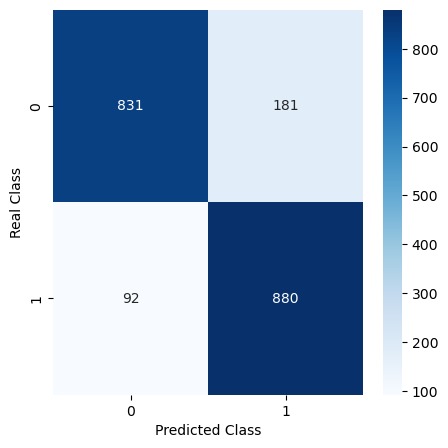

In [33]:
y_pred_ensemble = ensemble.predict(X_test)

print("--- Ensemble (Voting Classifier) ---")
print("Accuracy:", accuracy_score(y_test, y_pred_ensemble))
print("Precision:", precision_score(y_test, y_pred_ensemble))
print("Recall:", recall_score(y_test, y_pred_ensemble))
print("F1 Score:", f1_score(y_test, y_pred_ensemble))

print(classification_report(y_test,y_pred_ensemble,digits=4))
cm=confusion_matrix(y_test,y_pred_ensemble)
plt.figure(figsize=(5,5),dpi=100)
sns.heatmap(cm,cmap="Blues",annot=True,fmt="d")

plt.xlabel('Predicted Class')
plt.ylabel('Real Class')
plt.show()

In [34]:
from sklearn.ensemble import StackingClassifier

models_level_0=[
           ("dtc",dtc),("logistic_regression",logistic_regression),
            ("sgdclassifier",sgdclassifier),("adaboost",adaboost),("xgboost",xgboost),("gradient_boosting",gradient_boosting)
            ,("mtnb",mtnb)
]
final_level=SVC()
stacking_classifier=StackingClassifier(
            estimators=models_level_0,
            final_estimator=final_level,
            n_jobs=-1,
           
)
stacking_classifier.fit(X_train,y_train)


StackingClassifier(estimators=[('dtc', DecisionTreeClassifier()),
                               ('logistic_regression', LogisticRegression()),
                               ('sgdclassifier', SGDClassifier()),
                               ('adaboost', AdaBoostClassifier()),
                               ('xgboost',
                                XGBClassifier(base_score=None, booster=None,
                                              callbacks=None,
                                              colsample_bylevel=None,
                                              colsample_bynode=None,
                                              colsample_bytree=None,
                                              device=None,
                                              early_stopping_rounds=Non...
                                              max_cat_threshold=None,
                                              max_cat_to_onehot=None,
                                              max_delta_st

--- Stacking Classifier ---
Accuracy: 0.8729838709677419
Precision: 0.8557312252964426
Recall: 0.8909465020576132
F1 Score: 0.872983870967742
              precision    recall  f1-score   support

           0     0.8909    0.8557    0.8730      1012
           1     0.8557    0.8909    0.8730       972

    accuracy                         0.8730      1984
   macro avg     0.8733    0.8733    0.8730      1984
weighted avg     0.8737    0.8730    0.8730      1984



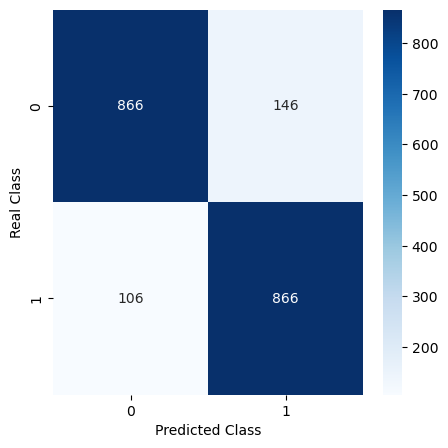

In [35]:
y_pred_stacking = stacking_classifier.predict(X_test)
print("--- Stacking Classifier ---")
print("Accuracy:", accuracy_score(y_test, y_pred_stacking))
print("Precision:", precision_score(y_test, y_pred_stacking))
print("Recall:", recall_score(y_test, y_pred_stacking))
print("F1 Score:", f1_score(y_test, y_pred_stacking))
print(classification_report(y_test,y_pred_stacking,digits=4))
cm=confusion_matrix(y_test,y_pred_stacking)
plt.figure(figsize=(5,5),dpi=100)
sns.heatmap(cm,cmap="Blues",annot=True,fmt="d")

plt.xlabel('Predicted Class')
plt.ylabel('Real Class')
plt.show()